## Basic Plotting

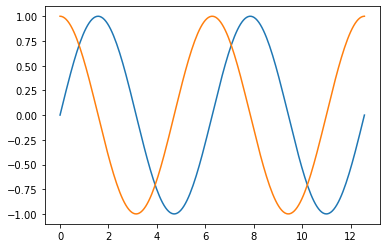

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 4.*np.pi, 200)
y = np.sin(x)
z = np.cos(x)
plt.plot(x, y)
plt.plot(x, z)
plt.show()

### figure

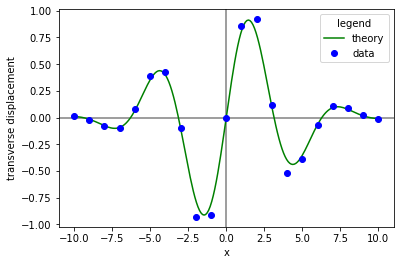

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10.0, 10.0, 200)
y = np.sin(x) * np.exp(-(x / 5.0) ** 2)
xdata, ydata = np.loadtxt("test-data/wavyPulseData.txt", unpack=True)

plt.figure(1, figsize=(6, 4))
plt.plot(x, y, "g-", zorder=1, label="theory")
plt.plot(xdata, ydata, "bo", zorder=1, label="data")
plt.xlabel("x")
plt.ylabel("transverse displacement")
plt.legend(loc="upper right", title="legend")
plt.axhline(color="gray", zorder=0)
plt.axvline(color="gray", zorder=0)

plt.show()

### Error bars

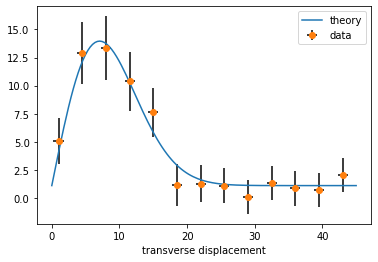

In [9]:
import numpy as np
import matplotlib.pyplot as plt

xdata, ydata, yerror = np.loadtxt("test-data/expDecayData.txt", unpack=True)

x = np.linspace(0, 45, 128)
y = 1.1 + 3.0 * x * np.exp(-(x / 10.0) ** 2)

plt.figure(1, figsize=(6, 4))
plt.plot(x, y, "-C0", label="theory")
plt.errorbar(
    xdata, ydata, fmt="oC1", label="data", xerr=0.75, yerr=yerror, ecolor="black"
)
plt.xlabel("x")
plt.xlabel("transverse displacement")
plt.legend(loc="upper right")

plt.show()

### plotting limit

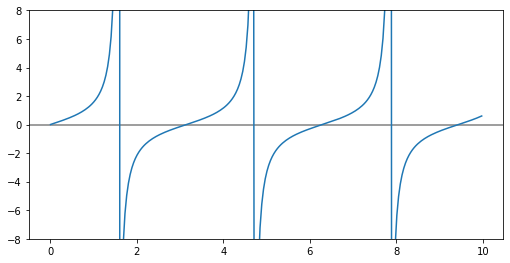

In [8]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.arange(0.01, 10.0, 0.04)
ytan = np.tan(theta)

plt.figure(figsize=(8.5, 4.2))
plt.plot(theta, ytan)
plt.ylim(-8, 8)
plt.axhline(color="gray", zorder=-1)

plt.show()

### subplots

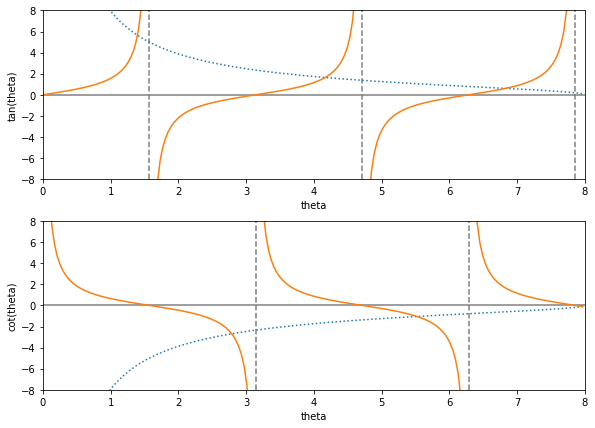

In [7]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.arange(0.01, 8.0, 0.04)
y = np.sqrt((8.0 / theta) ** 2 - 1.0)
ytan = np.tan(theta)
ytan = np.ma.masked_where(np.abs(ytan) > 20.0, ytan)
ycot = 1.0 / np.tan(theta)
ycot = np.ma.masked_where(np.abs(ycot) > 20.0, ycot)

plt.figure(figsize=(8.5, 6))

plt.subplot(2, 1, 1)
plt.plot(theta, y, linestyle=":")
plt.plot(theta, ytan)
plt.xlim(0, 8)
plt.ylim(-8, 8)
plt.axhline(color="gray", zorder=-1)
plt.axvline(x=np.pi / 2.0, color="gray", linestyle="--", zorder=-1)
plt.axvline(x=3 * np.pi / 2.0, color="gray", linestyle="--", zorder=-1)
plt.axvline(x=5 * np.pi / 2.0, color="gray", linestyle="--", zorder=-1)
plt.xlabel("theta")
plt.ylabel("tan(theta)")

plt.subplot(2, 1, 2)
plt.plot(theta, -y, linestyle=":")
plt.plot(theta, ycot)
plt.xlim(0, 8)
plt.ylim(-8, 8)
plt.axhline(color="gray", zorder=-1)
plt.axvline(x=np.pi, color="gray", linestyle="--", zorder=-1)
plt.axvline(x=2 * np.pi, color="gray", linestyle="--", zorder=-1)
plt.xlabel("theta")
plt.ylabel("cot(theta)")

plt.tight_layout()  # make room for the axes labels
plt.show()

### plots grid

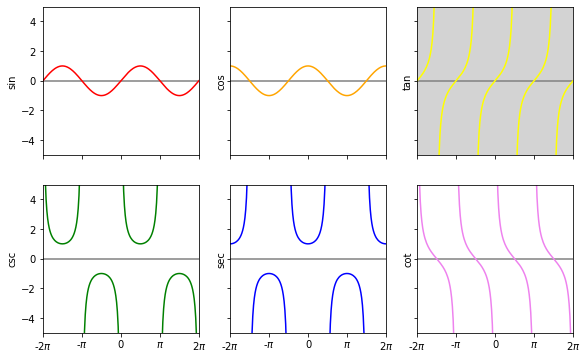

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2 * np.pi, 2 * np.pi, 200)
sin, cos, tan = np.sin(x), np.cos(x), np.tan(x)
csc, sec, cot = 1.0 / sin, 1.0 / cos, 1.0 / tan

_, ax = plt.subplots(2, 3, figsize=(9.5, 6), sharex=True, sharey=True)
ax[0, 0].plot(x, sin, color="red")
ax[0, 1].plot(x, cos, color="orange")
ax[0, 2].plot(x, np.ma.masked_where(np.abs(tan) > 20.0, tan), color="yellow")
ax[1, 0].plot(x, np.ma.masked_where(np.abs(csc) > 20.0, csc), color="green")
ax[1, 1].plot(x, np.ma.masked_where(np.abs(sec) > 20.0, sec), color="blue")
ax[1, 2].plot(x, np.ma.masked_where(np.abs(cot) > 20.0, cot), color="violet")

ax[0, 0].set_xlim(-2 * np.pi, 2 * np.pi)
ax[0, 0].set_ylim(-5, 5)

ax[0, 0].set_xticks(np.pi * np.array([-2, -1, 0, 1, 2]))
ax[0, 0].set_xticklabels(["-2$\pi$", "-$\pi$", "0", "$\pi$", "2$\pi$"])
ax[0, 2].patch.set_facecolor("lightgray")

ylab = [["sin", "cos", "tan"], ["csc", "sec", "cot"]]
for i in range(2):
    for j in range(3):
        ax[i, j].axhline(color="gray", zorder=-1)
        ax[i, j].set_ylabel(ylab[i][j])

### plots with multiple axes

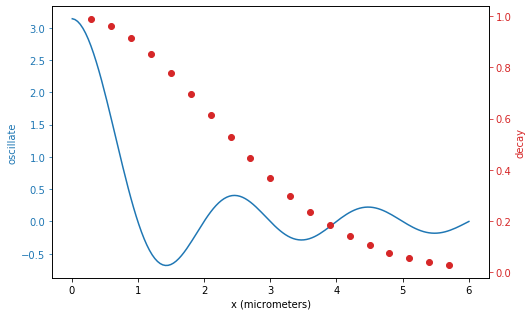

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(7.5, 4.5))
xa = np.linspace(0.01, 6.0, 150)
ya = np.sin(np.pi * xa) / xa
ax1.plot(xa, ya, "-C0")
ax1.set_xlabel("x (micrometers)")
ax1.set_ylabel("oscillate", color="C0")
ax1.tick_params("y", colors="C0")

ax2 = ax1.twinx()
xb = np.arange(0.3, 6.0, 0.3)
yb = np.exp(-xb * xb / 9.0)
ax2.plot(xb, yb, "oC3")
ax2.set_ylabel("decay", color="C3")
ax2.tick_params('y', colors='C3')
fig.tight_layout()

plt.show()

### 2D grid of points

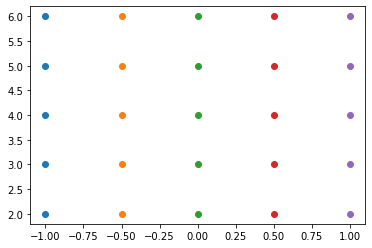

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 5)
y = np.linspace(2, 6, 5)
X,Y = np.meshgrid(x, y)
plt.plot(X, Y, 'o')

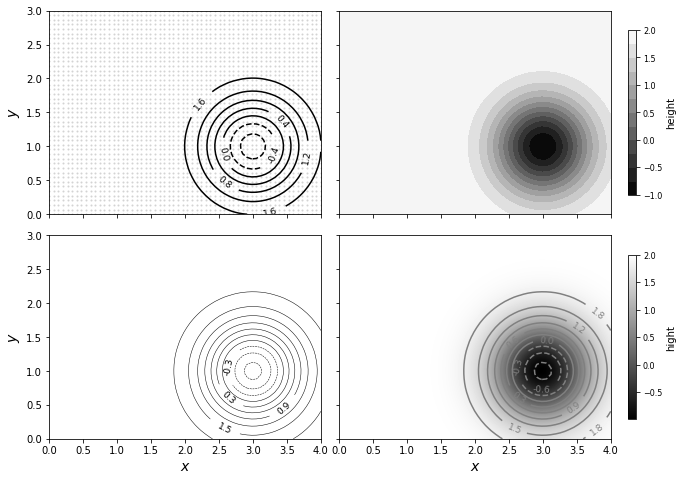

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib


def pmgauss(x, y):
    a = (x - 1) ** 2 + (y - 2) ** 2
    b = (x - 3) ** 2 + (y - 1) ** 2
    return 2 * np.exp(-0, 5 * a) - 3 * np.exp(-2 * b)


a, b = 4, 3

x = np.linspace(0, a, 60)
y = np.linspace(0, b, 45)

X, Y = np.meshgrid(x, y)
Z = pmgauss(X, Y)

fig, ax = plt.subplots(
    2,
    2,
    figsize=(9.4, 6.5),
    sharex=True,
    sharey=True,
    gridspec_kw={"width_ratios": [4, 5]},
)
cs0 = ax[0, 0].contour(X, Y, Z, 8, colors="k")
ax[0, 0].clabel(cs0, fontsize=9, fmt="%0.1f")
matplotlib.rcParams["contour.negative_linestyle"] = "dashed"
ax[0, 0].plot(X, Y, "o", ms=1, color="lightgray", zorder=-1)

cs1 = ax[0, 1].contourf(X, Y, Z, 12, cmap=cm.gray, zorder=0)
cbar1 = fig.colorbar(cs1, shrink=0.8, ax=ax[0, 1])
cbar1.set_label(label="height", fontsize=10)
plt.setp(cbar1.ax.yaxis.get_ticklabels(), fontsize=8)

lev2 = np.arange(-3, 2, 0.3)
cs2 = ax[1, 0].contour(X, Y, Z, levels=lev2, colors="k", linewidths=0.5)
ax[1, 0].clabel(cs2, lev2[1::2], fontsize=9, fmt="%0.1f")

cs3 = ax[1, 1].contour(X, Y, Z, 10, colors="gray")
ax[1, 1].clabel(cs3, fontsize=9, fmt="%0.1f")
im = ax[1, 1].imshow(
    Z, interpolation="bilinear", origin="lower", cmap=cm.gray, extent=(0, a, 0, b)
)
cbar2 = fig.colorbar(im, shrink=0.8, ax=ax[1, 1])
cbar2.set_label(label="hight", fontsize=10)
plt.setp(cbar2.ax.yaxis.get_ticklabels(), fontsize=8)

for i in range(2):
    ax[1, i].set_xlabel(r"$x$", fontsize=14)
    ax[i, 0].set_ylabel(r"$y$", fontsize=14)
    for j in range(2):
        ax[i, j].set_aspect("equal")
        ax[i, j].set_xlim(0, a)
        ax[i, j].set_ylim(0, b)

plt.subplots_adjust(
    left=0.06, bottom=0.07, right=0.99, top=0.99, wspace=0.06, hspace=0.09
)

### 3D plots

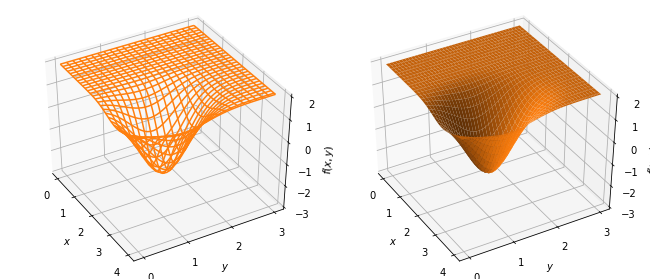

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def pmgauss(x, y):
    a = (x - 1) ** 2 + (y - 2) ** 2
    b = (x - 3) ** 2 + (y - 1) ** 2
    return 2 * np.exp(-0, 5 * a) - 3 * np.exp(-2 * b)


a, b = 4, 3

x = np.linspace(0, a, 60)
y = np.linspace(0, b, 45)

X, Y = np.meshgrid(x, y)
Z = pmgauss(X, Y)

fig, ax = plt.subplots(1, 2, figsize=(9.2, 4), subplot_kw={"projection": "3d"})

for i in range(2):
    ax[i].set_zlim(-3, 2)
    ax[i].xaxis.set_ticks(range(a + 1))
    ax[i].yaxis.set_ticks(range(b + 1))
    ax[i].set_xlabel(r"$x$")
    ax[i].set_ylabel(r"$y$")
    ax[i].set_zlabel(r"$f(x, y)$")
    ax[i].view_init(40, -30)

plt.subplots_adjust(left=0.04, bottom=0.04, right=0.96, top=0.96, wspace=0.05)

p0 = ax[0].plot_wireframe(X, Y, Z, rcount=40, ccount=40, color="C1")
p1 = ax[1].plot_surface(X, Y, Z, rcount=50, ccount=50, color="C1")

plt.subplots_adjust(left=0.0)